# Libs

In [756]:
# https://www.kaggle.com/datasets/abdelrahmanahmed110/used-cars-for-sale-in-egypt/data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import TargetEncoder, StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

# Dataset Details

In [757]:
data = pd.read_csv('hatla2ee_scraped_data.csv')
df = data.copy()
df.head()

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Item URL
0,Kia Sportage 2024,"2,800,000 EGP",Dark grey,300 Km,Kia,Sportage,Tagamo3 - New Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/kia/sportage/62...
1,Chery Arrizo 5 2022,NaN,Bronze,"86,000 Km",Chery,Arrizo 5,Nasr city,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/chery/Arrizo-5/...
2,Fiat Tipo 2021,"1,200,000 EGP",Petroleum,"131,000 Km",Fiat,Tipo,Kafr el-Dawwar,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/fiat/tipo/6286701
3,Hyundai Tucson Turbo GDI 2021,"2,050,000 EGP",Black,"125,000 Km",Hyundai,Tucson Turbo GDI,Nasr city,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/hyundai/Tucson-...
4,BMW X1 2018,"2,050,000 EGP",Gray,"84,000 Km",BMW,X1,Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/bmw/x1/6254123


In [758]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33559 entries, 0 to 33558
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    33559 non-null  object
 1   Price                   32625 non-null  object
 2   Color                   33559 non-null  object
 3   Mileage                 31440 non-null  object
 4   Make                    33559 non-null  object
 5   Model                   33559 non-null  object
 6   City                    33559 non-null  object
 7   Date Displayed          33559 non-null  object
 8   Automatic Transmission  33559 non-null  object
 9   Air Conditioner         33559 non-null  object
 10  Power Steering          33559 non-null  object
 11  Remote Control          33559 non-null  object
 12  Item URL                33559 non-null  object
dtypes: object(13)
memory usage: 3.3+ MB


In [759]:
df.isnull().sum()

,0
Name,0
Price,934
Color,0
Mileage,2119
Make,0
Model,0
City,0
Date Displayed,0
Automatic Transmission,0
Air Conditioner,0


In [760]:
df.describe()

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Item URL
count,33559,32625,33559,31440,33559,33559,33559,33559,33559,33559,33559,33559,33559
unique,4158,828,24,1084,101,889,103,124,2,2,2,2,22048
top,Nissan Sunny 2022,"650,000 EGP",Black,"200,000 Km",Hyundai,Sunny,Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/chevrolet/lanos...
freq,647,969,6532,1317,3800,1868,3983,12333,21289,20643,18450,19263,289


# Missings and Duplicates

In [761]:
# to remove EGP and KM from Price and Mileage
def clean_num(x):
    if type(x) == str:
        return float(x.split()[0].replace(',' , ''))
    else:
        return np.nan
df["Price"] = df["Price"].apply(clean_num)
df["Mileage"] = df["Mileage"].apply(clean_num)

df.head()

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Item URL
0,Kia Sportage 2024,2800000.0,Dark grey,300.0,Kia,Sportage,Tagamo3 - New Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/kia/sportage/62...
1,Chery Arrizo 5 2022,NaN,Bronze,86000.0,Chery,Arrizo 5,Nasr city,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/chery/Arrizo-5/...
2,Fiat Tipo 2021,1200000.0,Petroleum,131000.0,Fiat,Tipo,Kafr el-Dawwar,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/fiat/tipo/6286701
3,Hyundai Tucson Turbo GDI 2021,2050000.0,Black,125000.0,Hyundai,Tucson Turbo GDI,Nasr city,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/hyundai/Tucson-...
4,BMW X1 2018,2050000.0,Gray,84000.0,BMW,X1,Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/bmw/x1/6254123


In [762]:
print(len(df))

df = df.dropna(subset=['Price']).copy() # Remove missing targets and ensure it's a new copy
df["Mileage"] = df["Mileage"].fillna(df["Mileage"].median()) # Fill missing values with median

print(len(df))

33559
32625


In [763]:
df.isnull().sum() # GG =))

,0
Name,0
Price,0
Color,0
Mileage,0
Make,0
Model,0
City,0
Date Displayed,0
Automatic Transmission,0
Air Conditioner,0


#Feature Selection/Creation

In [764]:
df = df.drop('Item URL', axis=1) # mlo4 lazma
df.head()

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control
0,Kia Sportage 2024,2800000.0,Dark grey,300.0,Kia,Sportage,Tagamo3 - New Cairo,2024-02-16,Yes,Yes,Yes,Yes
2,Fiat Tipo 2021,1200000.0,Petroleum,131000.0,Fiat,Tipo,Kafr el-Dawwar,2024-02-16,Yes,Yes,Yes,Yes
3,Hyundai Tucson Turbo GDI 2021,2050000.0,Black,125000.0,Hyundai,Tucson Turbo GDI,Nasr city,2024-02-16,Yes,Yes,Yes,Yes
4,BMW X1 2018,2050000.0,Gray,84000.0,BMW,X1,Cairo,2024-02-16,Yes,Yes,Yes,Yes
5,Chevrolet Optra 2021,700000.0,Blue,75000.0,Chevrolet,Optra,Obour City,2024-02-16,Yes,Yes,Yes,Yes


#### Handle Date_Displayed Column and Date in Name Column

In [765]:
extracted_years = df['Name'].str.extract(r'((?:19|20)\d{2})', expand=False) # get model year from Name column.
df['Model_Year'] = pd.to_numeric(extracted_years, errors='coerce') # add it as a new column

In [766]:
df.isnull().sum()

,0
Name,0
Price,0
Color,0
Mileage,0
Make,0
Model,0
City,0
Date Displayed,0
Automatic Transmission,0
Air Conditioner,0


In [767]:
# Fill NaN Model_Year with the mode of existing years, then convert to int
mode_model_year = int(df['Model_Year'].mode()[0])
df['Model_Year'] = df['Model_Year'].fillna(mode_model_year).astype(int)

In [768]:
df.isnull().sum() # a5yran

,0
Name,0
Price,0
Color,0
Mileage,0
Make,0
Model,0
City,0
Date Displayed,0
Automatic Transmission,0
Air Conditioner,0


### Create New Features Based Date


In [769]:
# Create Car_Age Feature
df['Date Displayed'] = pd.to_datetime(df['Date Displayed'])
df['Listing_Year'] = df['Date Displayed'].dt.year
df['Listing_Month'] = df['Date Displayed'].dt.month

df['Car_Age'] = df['Listing_Year'] - df['Model_Year']


### Drop Raw Data

In [770]:
cols_to_drop = ['Name', 'Date Displayed', 'Model_Year']
df = df.drop(columns=cols_to_drop)

df

,Price,Color,Mileage,Make,Model,City,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Listing_Year,Listing_Month,Car_Age
0,2800000.0,Dark grey,300.0,Kia,Sportage,Tagamo3 - New Cairo,Yes,Yes,Yes,Yes,2024,2,0
2,1200000.0,Petroleum,131000.0,Fiat,Tipo,Kafr el-Dawwar,Yes,Yes,Yes,Yes,2024,2,3
3,2050000.0,Black,125000.0,Hyundai,Tucson Turbo GDI,Nasr city,Yes,Yes,Yes,Yes,2024,2,3
4,2050000.0,Gray,84000.0,BMW,X1,Cairo,Yes,Yes,Yes,Yes,2024,2,6
5,700000.0,Blue,75000.0,Chevrolet,Optra,Obour City,Yes,Yes,Yes,Yes,2024,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33553,650000.0,Black,199000.0,Toyota,Corolla,Alexandria,No,No,No,No,2024,2,16
33554,900000.0,White,240000.0,Jac,J3,6 October,Yes,No,No,No,2024,2,3
33555,3000000.0,Dark grey,129000.0,Skoda,Kodiaq,Tagamo3 - New Cairo,Yes,Yes,Yes,Yes,2024,2,1
33556,1170000.0,Black,48000.0,MG,5,Kafr el-Dawwar,Yes,Yes,Yes,Yes,2024,2,2


In [771]:
df.describe()
# car_age min value is -1???????
# min price is 1060 gneh???????????

,Price,Mileage,Listing_Year,Listing_Month,Car_Age
count,3.262500e+04,3.262500e+04,32625.000000,32625.000000,32625.000000
mean,9.544847e+05,1.501273e+05,2023.645027,5.111448,9.314667
std,1.086724e+06,2.123919e+05,0.478513,4.567349,8.337757
min,1.060000e+03,0.000000e+00,2023.000000,1.000000,-1.000000
25%,3.830000e+05,7.000000e+04,2023.000000,2.000000,3.000000
50%,6.500000e+05,1.290000e+05,2024.000000,2.000000,7.000000
75%,1.050000e+06,1.850000e+05,2024.000000,11.000000,14.000000
max,2.000000e+07,2.226000e+06,2024.000000,12.000000,60.000000


In [772]:
df.loc[df['Car_Age'] < 0, 'Car_Age'] = 0

df = df[df['Price'] > 50000]
df = df[df['Price'] < 10000000]

df.describe()

,Price,Mileage,Listing_Year,Listing_Month,Car_Age
count,3.236600e+04,3.236600e+04,32366.000000,32366.000000,32366.000000
mean,9.535144e+05,1.503486e+05,2023.647377,5.090651,9.103287
std,1.040675e+06,2.131665e+05,0.477794,4.560248,7.937026
min,5.200000e+04,0.000000e+00,2023.000000,1.000000,0.000000
25%,3.900000e+05,7.000000e+04,2023.000000,2.000000,3.000000
50%,6.500000e+05,1.290000e+05,2024.000000,2.000000,7.000000
75%,1.050000e+06,1.850000e+05,2024.000000,11.000000,14.000000
max,9.800000e+06,2.226000e+06,2024.000000,12.000000,60.000000


# Split Before Encoding
As in slides, some encoding methods depends on the mean of target, so if I don't split, the mean of the test dataset will affect the mean of the training dataset. "aka. Data Leakage"

However, I can do label encoding first

### Binary Mapping On Binary Columns First

So I don't need to map them in two steps: the training and testing data.

In [773]:
binary_cols = ['Automatic Transmission', 'Air Conditioner', 'Power Steering', 'Remote Control']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

### Splitting

In [774]:
X = df.drop(columns=['Price'])
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [775]:
X.describe()

,Mileage,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Listing_Year,Listing_Month,Car_Age
count,3.236600e+04,32366.000000,32366.000000,32366.000000,32366.000000,32366.000000,32366.000000,32366.000000
mean,1.503486e+05,0.646481,0.619724,0.559723,0.576747,2023.647377,5.090651,9.103287
std,2.131665e+05,0.478069,0.485462,0.496428,0.494082,0.477794,4.560248,7.937026
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2023.000000,1.000000,0.000000
25%,7.000000e+04,0.000000,0.000000,0.000000,0.000000,2023.000000,2.000000,3.000000
50%,1.290000e+05,1.000000,1.000000,1.000000,1.000000,2024.000000,2.000000,7.000000
75%,1.850000e+05,1.000000,1.000000,1.000000,1.000000,2024.000000,11.000000,14.000000
max,2.226000e+06,1.000000,1.000000,1.000000,1.000000,2024.000000,12.000000,60.000000


In [776]:
X

,Color,Mileage,Make,Model,City,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Listing_Year,Listing_Month,Car_Age
0,Dark grey,300.0,Kia,Sportage,Tagamo3 - New Cairo,1,1,1,1,2024,2,0
2,Petroleum,131000.0,Fiat,Tipo,Kafr el-Dawwar,1,1,1,1,2024,2,3
3,Black,125000.0,Hyundai,Tucson Turbo GDI,Nasr city,1,1,1,1,2024,2,3
4,Gray,84000.0,BMW,X1,Cairo,1,1,1,1,2024,2,6
5,Blue,75000.0,Chevrolet,Optra,Obour City,1,1,1,1,2024,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
33553,Black,199000.0,Toyota,Corolla,Alexandria,0,0,0,0,2024,2,16
33554,White,240000.0,Jac,J3,6 October,1,0,0,0,2024,2,3
33555,Dark grey,129000.0,Skoda,Kodiaq,Tagamo3 - New Cairo,1,1,1,1,2024,2,1
33556,Black,48000.0,MG,5,Kafr el-Dawwar,1,1,1,1,2024,2,2


# Encoding


In [777]:
# based on the num of unique values h5tar el encoding technique
print(df.info())
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
Index: 32366 entries, 0 to 33557
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price                   32366 non-null  float64
 1   Color                   32366 non-null  object 
 2   Mileage                 32366 non-null  float64
 3   Make                    32366 non-null  object 
 4   Model                   32366 non-null  object 
 5   City                    32366 non-null  object 
 6   Automatic Transmission  32366 non-null  int64  
 7   Air Conditioner         32366 non-null  int64  
 8   Power Steering          32366 non-null  int64  
 9   Remote Control          32366 non-null  int64  
 10  Listing_Year            32366 non-null  int32  
 11  Listing_Month           32366 non-null  int32  
 12  Car_Age                 32366 non-null  int64  
dtypes: float64(2), int32(2), int64(5), object(4)
memory usage: 3.2+ MB
None
Price                   

In [778]:
print(X_train.shape)
print(X_train.columns)
print(len(X_train.columns))
print(f"Number of unique colors {len(X_train['Color'].unique())}")

(25892, 12)
Index(['Color', 'Mileage', 'Make', 'Model', 'City', 'Automatic Transmission',
       'Air Conditioner', 'Power Steering', 'Remote Control', 'Listing_Year',
       'Listing_Month', 'Car_Age'],
      dtype='object')
12
Number of unique colors 24


### Encoding (OneHot, target)

`target_type="continuous"` for target encoding as `Price` Dtype is `float64`




In [779]:
cols_one_hot = ['Color']
cols_target  = ['Make', 'Model', 'City']

preprocessor = ColumnTransformer(
  transformers=[
        ('one_hot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cols_one_hot),
        ('target_enc', TargetEncoder(smooth='auto', target_type="continuous", random_state=42), cols_target)
    ],
    remainder='passthrough'# Keep Mileage, Year, Binary Cols, Car_Age as is
)


In [780]:
X_train = preprocessor.fit_transform(X_train, y_train)
X_test  = preprocessor.transform(X_test)

print("New Shape:", X_train.shape)

New Shape: (25892, 34)


# Scaling

Used `RobustScaler` because Mileage column was skewed.

In [781]:
# (Handles outliers better than StandardScaler)
scaler = RobustScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [782]:
X_train

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.09090909],
       [ 0.        ,  0.        ,  0.        , ..., -1.        ,
         0.88888889,  0.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.45454545],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.27272727],
       [ 0.        ,  0.        ,  0.        , ..., -1.        ,
         0.88888889,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.45454545]])

# Regression


## DecisionTreeRegressor

In [783]:
tree_model = DecisionTreeRegressor(random_state=42, max_depth=20)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

R2_TREE = r2_score(y_test, y_pred_tree) # R square
MAE_TREE = mean_absolute_error(y_test, y_pred_tree) # Mean Absolute Error
RMSE_TREE = np.sqrt(mean_squared_error(y_test, y_pred_tree)) # Root Mean Squared Error

## Random Forest Regression

In [784]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

R_SQUARED_RF = r2_score(y_test, y_pred_rf) # R square
MAE_RF = mean_absolute_error(y_test, y_pred_rf) # Mean Absolute Error
MSE_RF = mean_squared_error(y_test, y_pred_rf)
RMSE_RF = np.sqrt(MSE_RF) # Root Mean Squared Error

# Visualization

----Decision Tree Regressor----
R-squared score: 0.8398
Mean Absolute Error (MAE): 140,591 EGP
Root Mean Squared Error (RMSE): 412,024 EGP


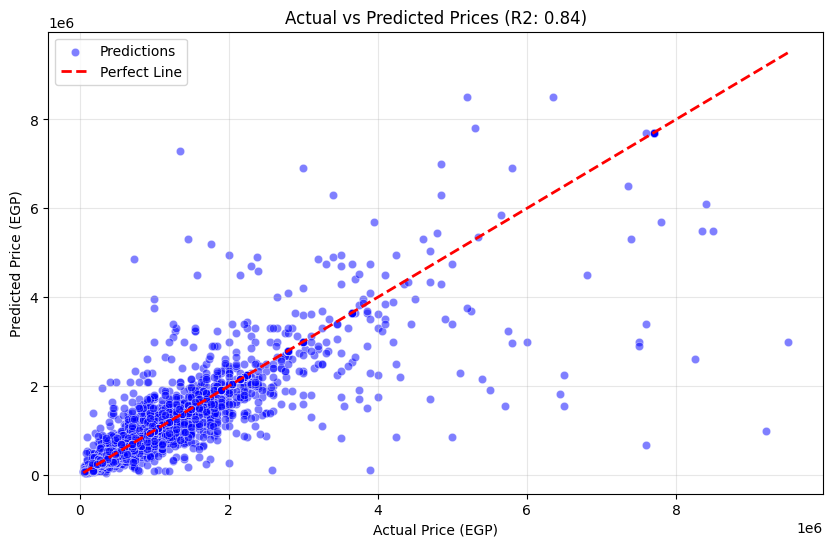

In [785]:
print("----Decision Tree Regressor----")
print(f"R-squared score: {R2_TREE:.4f}")
print(f"Mean Absolute Error (MAE): {MAE_TREE:,.0f} EGP")
print(f"Root Mean Squared Error (RMSE): {RMSE_TREE:,.0f} EGP")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_tree, alpha=0.5, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Line')

plt.xlabel('Actual Price (EGP)')
plt.ylabel('Predicted Price (EGP)')
plt.title(f'Actual vs Predicted Prices (R2: {R2_TREE:.2f})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('decision_tree_predictions.png')
plt.show()

----Random Forest Regrssion----
R-squared score: 0.9020
Mean Absolute Error (MAE): 105,675 EGP
Root Mean Squared Error (RMSE): 322,304 EGP


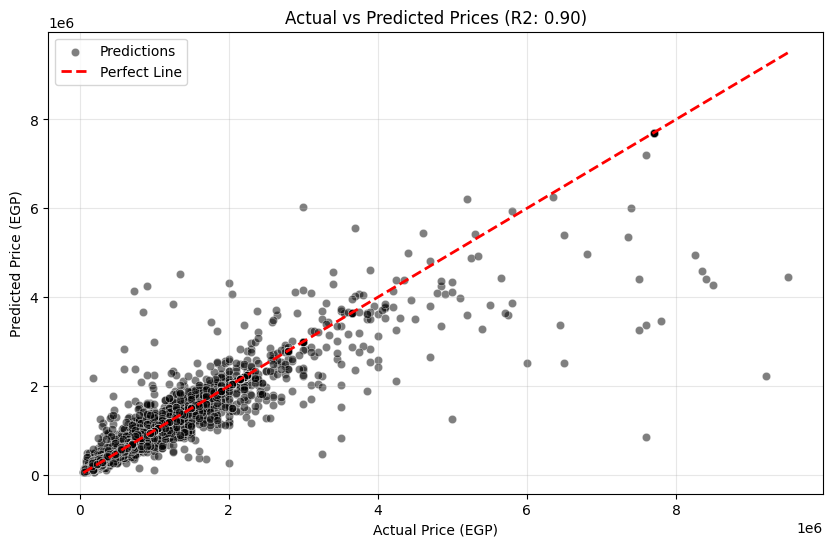

In [786]:
print("----Random Forest Regrssion----")
print(f"R-squared score: {R_SQUARED_RF:.4f}")
print(f"Mean Absolute Error (MAE): {MAE_RF:,.0f} EGP")
print(f"Root Mean Squared Error (RMSE): {RMSE_RF:,.0f} EGP")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5, color='black', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Line')

plt.xlabel('Actual Price (EGP)')
plt.ylabel('Predicted Price (EGP)')
plt.title(f'Actual vs Predicted Prices (R2: {R_SQUARED_RF:.2f})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('random_forest_predictions.png')
plt.show()

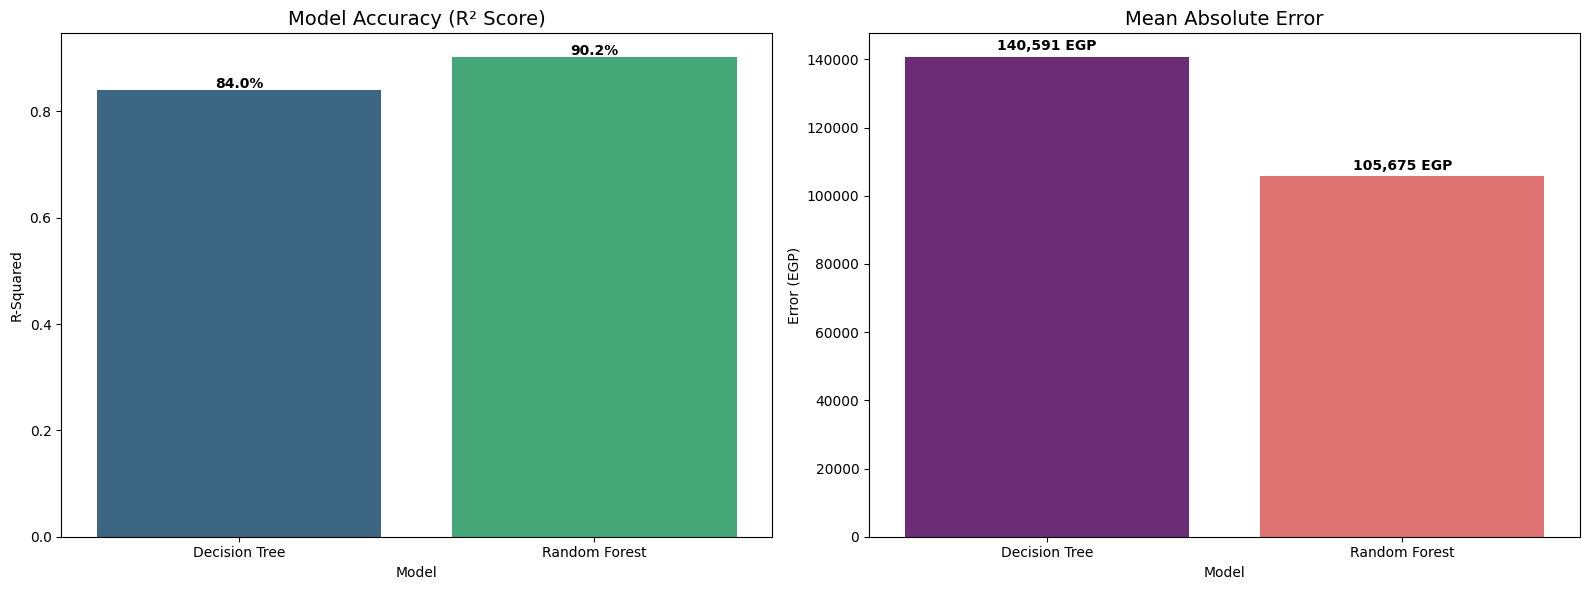

In [787]:
model_data = {
    'Model': ['Decision Tree', 'Random Forest'],
    'R-Squared': [R2_TREE, R_SQUARED_RF],
    'MAE': [MAE_TREE, MAE_RF],
    'RMSE': [RMSE_TREE, RMSE_RF]
}

df_comparison = pd.DataFrame(model_data)

# Plotting
plt.figure(figsize=(16, 6))

# R-Squared (Accuracy)
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='Model', y='R-Squared', hue='Model', data=df_comparison, palette='viridis', legend=False)
plt.title('Model Accuracy (R² Score)', fontsize=14)
plt.ylabel('R-Squared')

for i, v in enumerate(df_comparison['R-Squared']):
    ax1.text(i, v + 0.005, f"{v:.1%}", ha='center', fontweight='bold')

# MAE (Error)
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='Model', y='MAE', hue='Model', data=df_comparison, palette='magma', legend=False)
plt.title('Mean Absolute Error', fontsize=14)
plt.ylabel('Error (EGP)')

for i, v in enumerate(df_comparison['MAE']):
    ax2.text(i, v + 2000, f"{v:,.0f} EGP", ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('model_comparison_metrics.png') # Saves the plot
plt.show()